""" Właśnie otrzymałeś pracę kontraktową z firmą e-commerce, która sprzedaje 
ubrania online, ale ma też sesje z poradami dotyczącymi stylu i odzieży w sklepie. 
klienci przychodzą do sklepu, odbywają sesje/spotkania z osobistą stylistką,
następnie mogą wrócić do domu i zamówić przez aplikację mobilną lub 
tronę internetową wybrane ubrania. Firma próbuje zdecydować, czy skoncentrować swoje wysiłki na korzystaniu 
z aplikacji mobilnej, czy ze strony internetowej. 
Pomóź im to rozgryźć!
"""


## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## the Data set

Będziemy pracować z plikiem Ecommerce Customers.csv . Zawiera informacje o klientach, takie jak e-mail, adres i ich kolor Avatara. Ponad to kolumny o wartości liczbowych: 

* Śr. Długości sesji: średnia sesja porad dot. stylu.
* Czas w aplikacji: średni czas spędzony w aplikacji w minutach
* Czas spędzony na witrynie: średni czas spędzony na witrynie w minutach
* Długość członkostwa: od ilu lat klient jest członkiem. 

**-- Przeczytaj plik Ecommerce Customers.csv  jako DataFrame o nazwie customers.---**

**Spawdż funkcji head(), info() oraz describe().**

In [3]:
dataset = pd.read_csv('EcommerceCustomers.csv')

In [4]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploaracja danych
** Użyj seaborn, aby stworzyć wspólny wykres, aby zbadać kolumny "The time on Website" oraz "Yearly Amount Spent" na website. Czy ta korelacja ma jakiś sens?** 

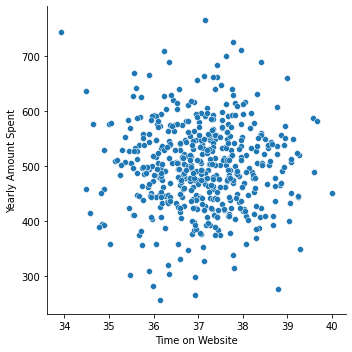

In [7]:
sns.relplot(data=dataset, x="Time on Website", y="Yearly Amount Spent")

Nie ma korelacji

** Zrób to samo, ale zamiast tego użyj kolumny "Time on App". ** 

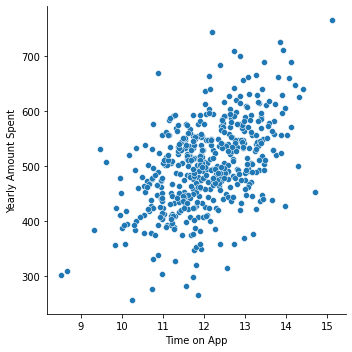

In [9]:
sns.relplot(data=dataset, x="Time on App", y="Yearly Amount Spent")

** Użyj jointplot abt utworzyć wykres 2D hex bin, porównuj "Time on App" i "Length of Membership"**

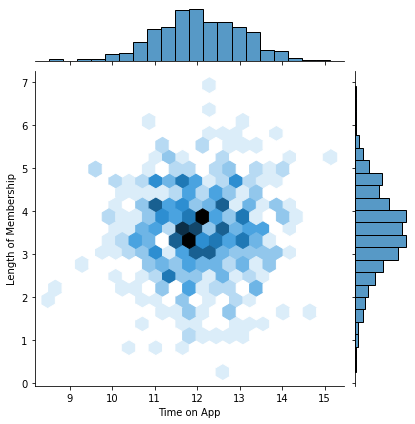

In [10]:
sns.jointplot(data=dataset, x="Time on App", y="Length of Membership", kind="hex")

** Użyj [pairplot] plotting-pairwise-relationships-with-pairgrid-and-pairplot)**

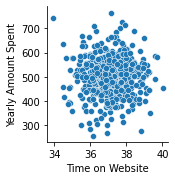

In [11]:
sns.pairplot(dataset, x_vars=["Time on Website"],
    y_vars=["Yearly Amount Spent"],)

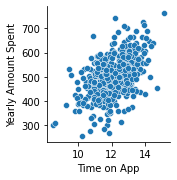

In [12]:
sns.pairplot(dataset, x_vars=["Time on App"],
    y_vars=["Yearly Amount Spent"],)

** Na podstawie tego wykresu, która funkcja wygląda na najbardziej skorelowaną z roczną wydaną kwotą?** 

Time on App jest bardziej skorelowana z roczną wydaną kwotą.

** Utwórz wykres modelu liniowego (przy użyciu lmplot seaborn) prezentując rocznej kwoty wydanej w stosunku do długości członkostwa. ** 

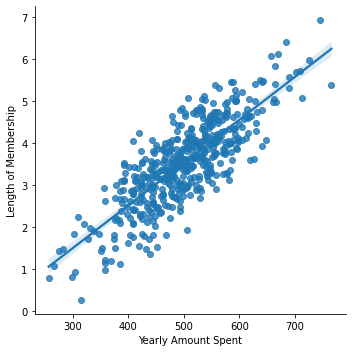

In [13]:
sns.lmplot(x="Yearly Amount Spent", y="Length of Membership", data=dataset)

## Training and Testing Data

podziel dane na zestawy treningowe i testowe.
** Ustaw zmienną X (zmienne niezależne) oraz zmienną y równą zmienną zależną. ** 

In [14]:
#zmienne zależne
X = dataset[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

#zmienne niezależne
y = dataset[['Yearly Amount Spent']]

** Użyj model_selection.train_test_split, aby podzielić dane na zestawy: trainigowy i testowy. Ustaw test_size=0.3 i random_state=101 
**

In [17]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

## Training the Model
** dokonaj importu LinearRegression from sklearn.linear_model **

In [18]:
from sklearn.linear_model import LinearRegression

**Utwórz  LinearRegression() model. Nazwyj go swoje Nazwisko_lm.**

In [19]:
Palecki_lm = LinearRegression()

** Dopasuj(fit) model  przy użyciu dane treningowe.**

In [20]:
Palecki_lm.fit(X_train, y_train)

LinearRegression()

**Wydrukuj współczynniki modelu **

In [21]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382
...,...,...,...,...
63,32.789773,11.670066,37.408748,3.414688
326,33.217188,10.999684,38.442767,4.243813
337,31.827979,12.461147,37.428997,2.974737
11,33.879361,11.584783,37.087926,3.713209


In [22]:
y_train

,Yearly Amount Spent
202,443.965627
428,556.298141
392,549.131573
86,487.379306
443,561.516532
...,...
63,483.159721
326,505.230068
337,440.002748
11,522.337405


## Predykcja
** Uzyj predict() do predykcji zbioru testowego.**

In [23]:
y_predictions=Palecki_lm.predict(X_test)

** Utwórz scatterplot reprezentując rzeczywiste wartości testowe i  te pochodzace z predykcji. **

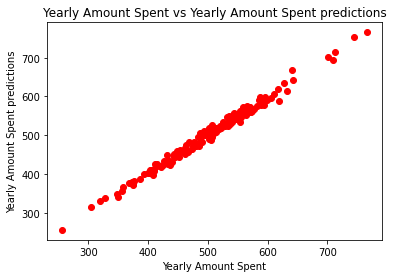

In [24]:
plt.scatter(y_test, y_predictions, color = 'red')
plt.title('Yearly Amount Spent vs Yearly Amount Spent predictions')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Yearly Amount Spent predictions')
plt.show()

## Evaluacja  Modelu

** Oblicz błędy: Mean Absolute Error, Mean Squared Error, oraz the Root Mean Squared Error. 

In [25]:
from sklearn import metrics
print('MAE = ', metrics.mean_absolute_error(y_test, y_predictions ))
print('MSE = ', metrics.mean_squared_error(y_test, y_predictions ))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_predictions )))

MAE =  7.228148653430826
MSE =  79.81305165097427
RMSE =  8.933815066978624


## Residuals
Powinieneś mieć bardzo dobry model z dobrym dopasowaniem. Przeanalizuj resztę/szum modelu, aby upewnić się, że z naszymi danymi wszystko jest w porządku.  

** Sporządź histogram reszt i upewnij się, że wygląda on normalnie. Użyj albo seaborn distplot, albo po prostu plt.hist().**

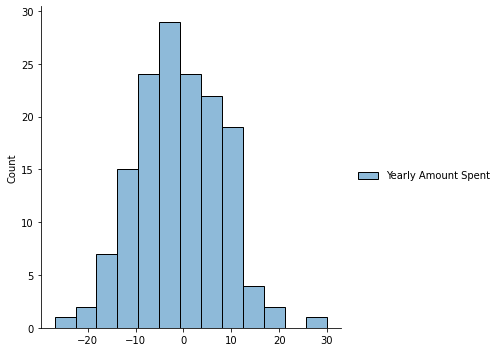

In [26]:
sns.displot(y_test - y_predictions)